In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
import numpy as np
from scipy.signal import gausspulse
import matplotlib.pyplot as plt

from filter_tc.sensitivity_analysis.data_generation import *

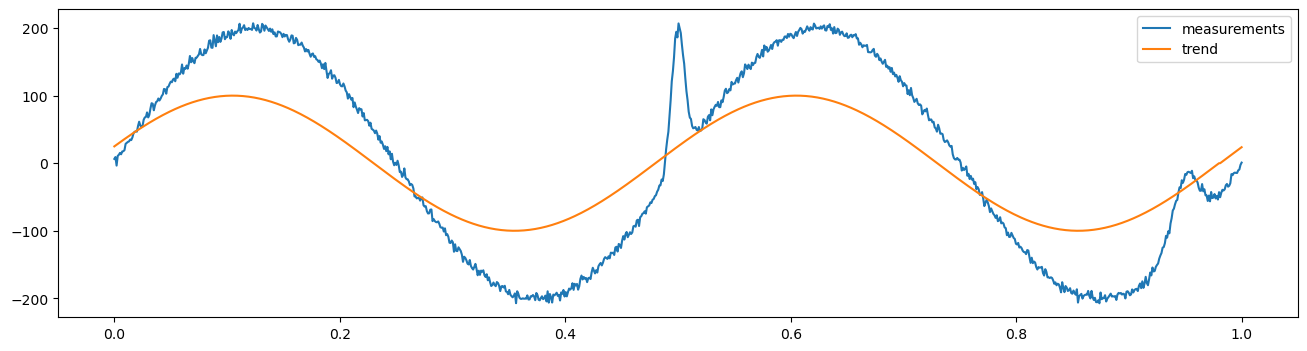

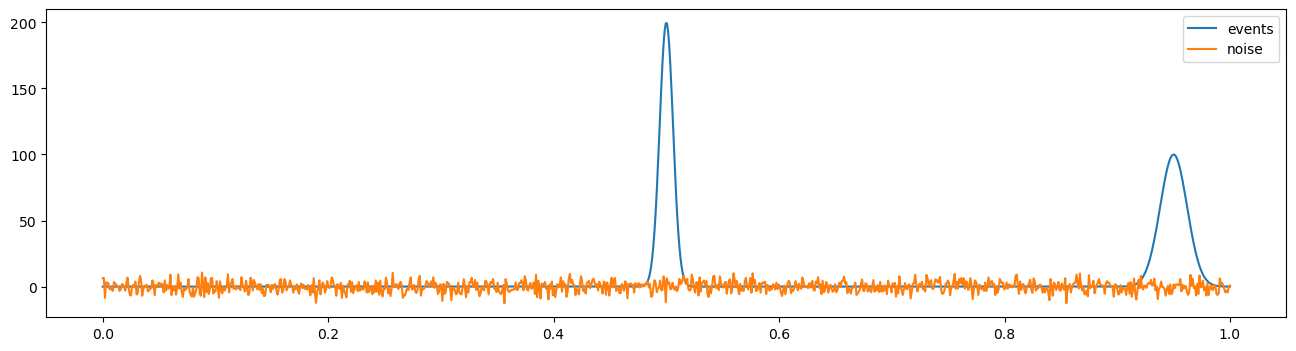

In [113]:
trend = {
        'amplitude': 400.0,
        'frequency': 2.0,
        'cycles':2.0,
        'phase': 0.0
        }
events = {
        'amplitude': [100, 200],
        'duration': [100, 50],
        'occurence': [0.95, 0.5]
        }
no_samples = 1000
noise_amplitude = 4.0
loading = 'compression'
amplitude_shift = 0.5
time_shift = 0.02


t, y_measurements, input_, y_lf, y_events, y_noise = \
    generate_test_data(trend, events, no_samples, noise_amplitude, loading, amplitude_shift, time_shift)
plt.figure(figsize=(16, 4))
plt.plot(t, y_measurements, label='measurements')
plt.plot(t, input_, label='trend')
plt.legend()
plt.show()
plt.close()
plt.figure(figsize=(16, 4))
plt.plot(t, y_events, label='events')
plt.plot(t, y_noise, label='noise')
plt.legend()
plt.show()
plt.close()

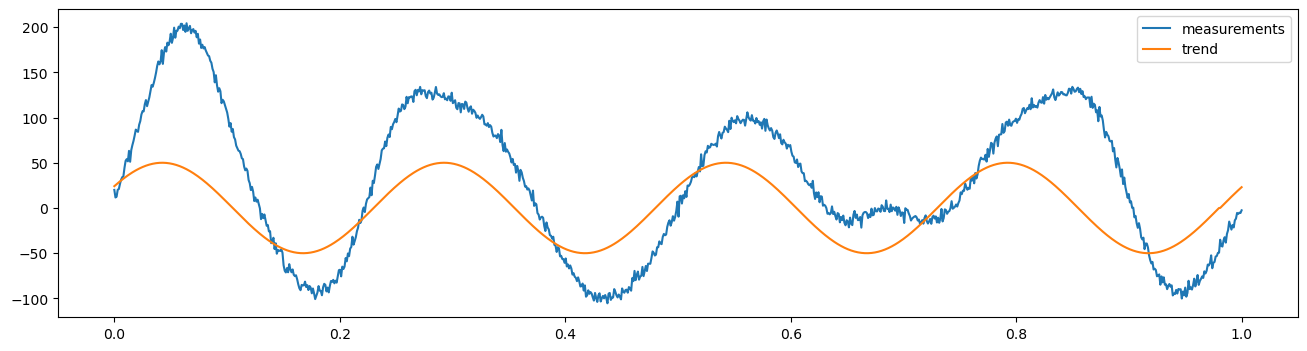

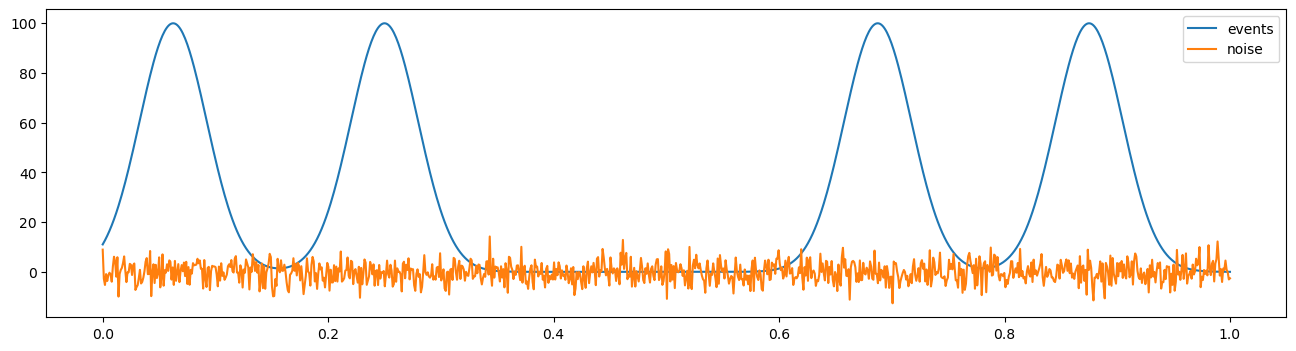

In [114]:
event_to_trend_amplitude = 1/2
event_length_to_trend_period = 1
amplitude_shift = 0.5
time_shift = 0.02

trend, events, noise_amplitude, no_samples = create_inputs(event_to_trend_amplitude, event_length_to_trend_period)
t, y_measurements, input_, y_lf, y_events, y_noise = generate_test_data(trend, events, no_samples, noise_amplitude, loading, amplitude_shift, time_shift)

plt.figure(figsize=(16, 4))
plt.plot(t, y_measurements, label='measurements')
plt.plot(t, input_, label='trend')
plt.legend()
plt.show()
plt.close()
plt.figure(figsize=(16, 4))
plt.plot(t, y_events, label='events')
plt.plot(t, y_noise, label='noise')
plt.legend()
plt.show()
plt.close()

In [115]:
event_to_trend_amplitudes = np.arange(0.3, 0.6, 0.1)
event_length_to_trend_periods = np.arange(0.1, 0.6, 0.2)
amplitude_shift = 0.5
time_shift = 0.005

datasets = {}

for event_to_trend_amplitude in event_to_trend_amplitudes:
    for event_length_to_trend_period in event_length_to_trend_periods:
        trend, events, noise_amplitude, no_samples = \
            create_inputs(
                event_to_trend_amplitude,
                event_length_to_trend_period,
                noise_to_trend = 1/50,
                no_samples = 1000,
                trend_freq = 4.0,
                trend_amplitude = 200
            )
        t, y_measurements, input_, y_lf, y_events, y_noise = \
            generate_test_data(
                trend,
                events,
                no_samples,
                noise_amplitude,
                loading,
                amplitude_shift,
                time_shift
            )
        datasets[(event_to_trend_amplitude, event_length_to_trend_period)] = {
            't':t,
            'y_measurements':y_measurements,
            'input_':input_,
            'y_lf':y_lf,
            'y_events':y_events,
            'y_noise':y_noise
        }

(event_to_trend_amplitude, event_length_to_trend_periods) (0.3, 0.1)


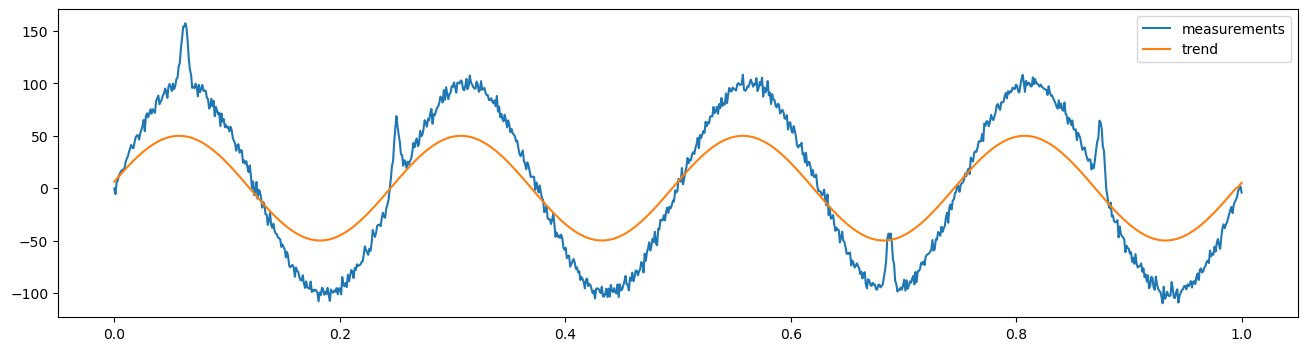

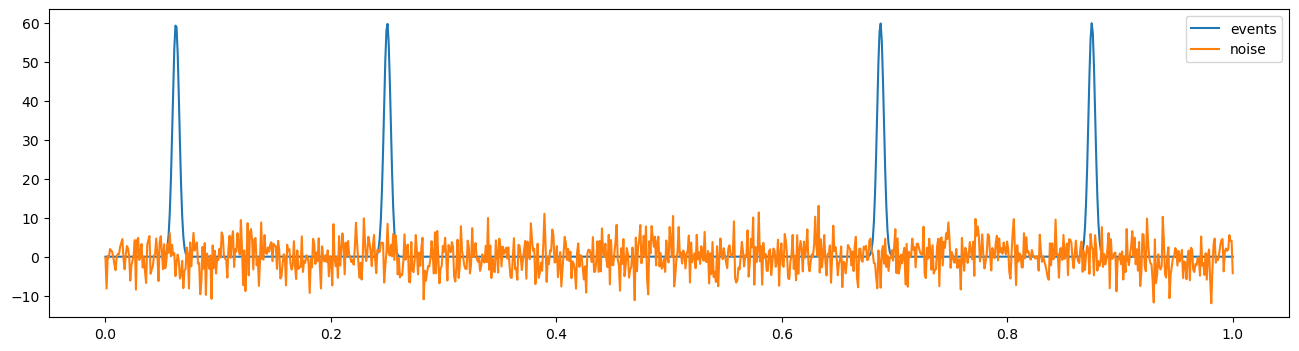

(event_to_trend_amplitude, event_length_to_trend_periods) (0.3, 0.30000000000000004)


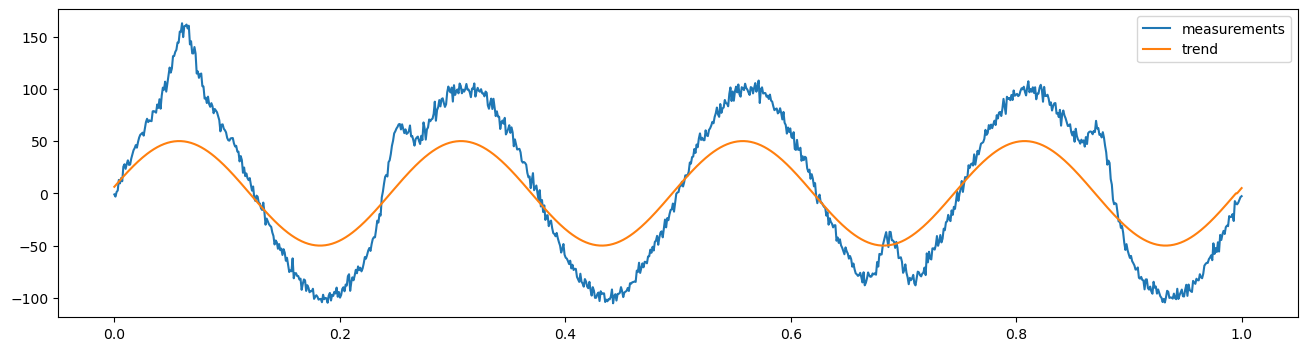

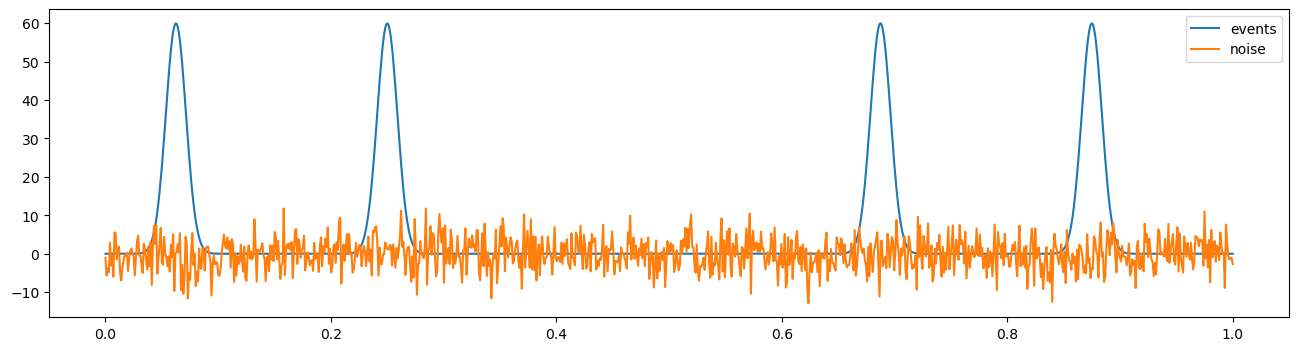

(event_to_trend_amplitude, event_length_to_trend_periods) (0.3, 0.5000000000000001)


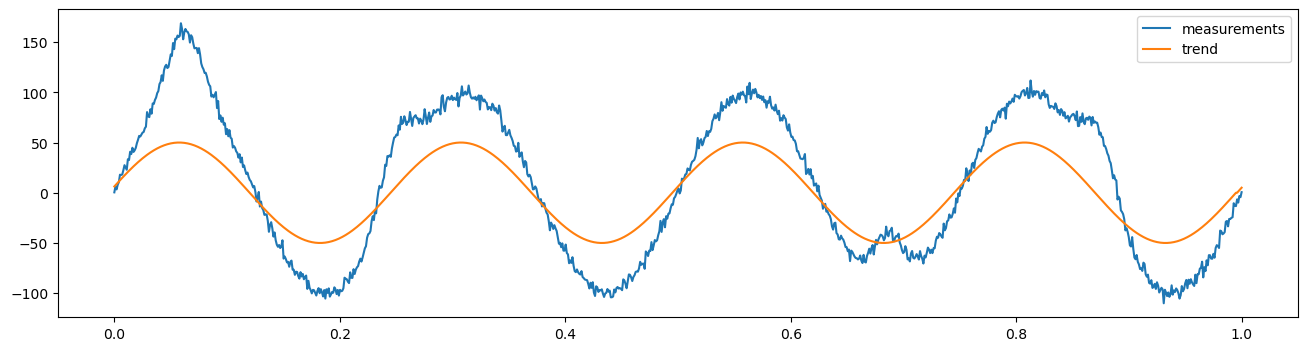

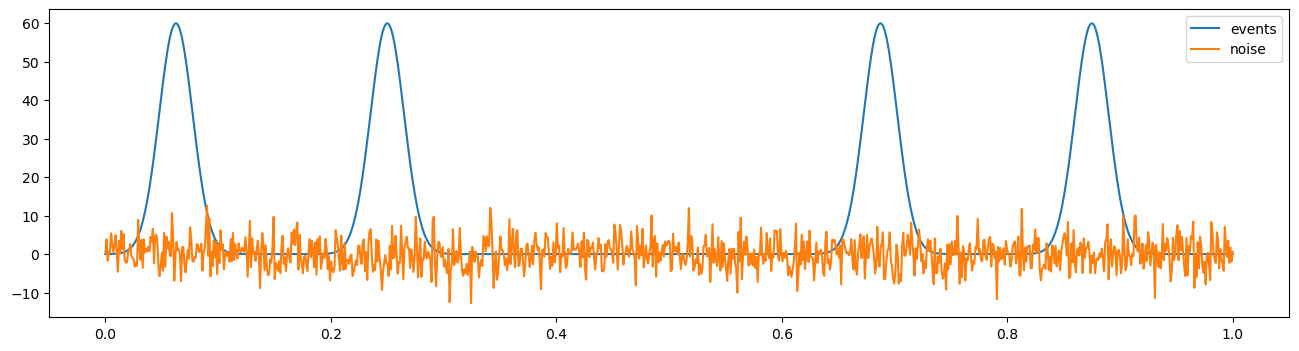

(event_to_trend_amplitude, event_length_to_trend_periods) (0.4, 0.1)


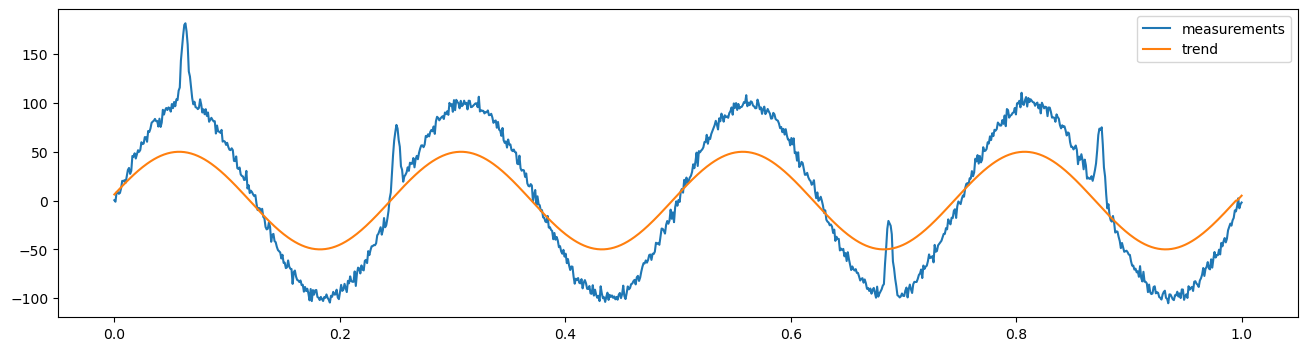

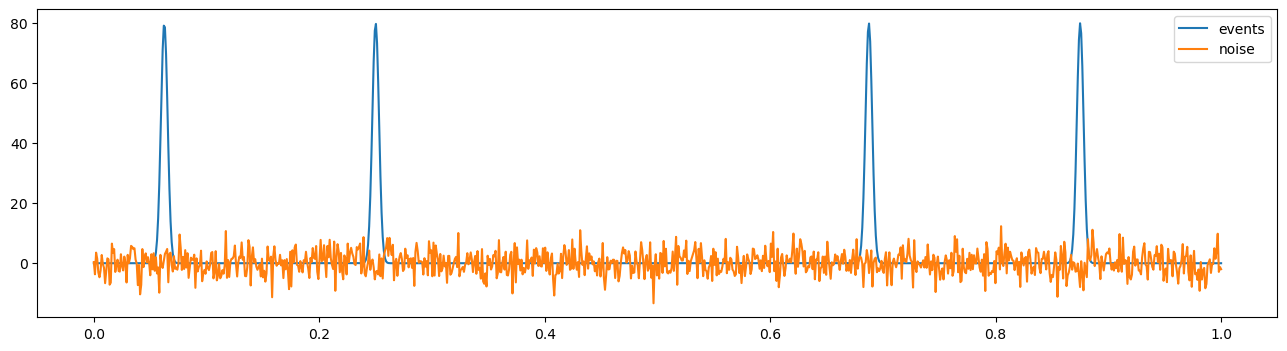

(event_to_trend_amplitude, event_length_to_trend_periods) (0.4, 0.30000000000000004)


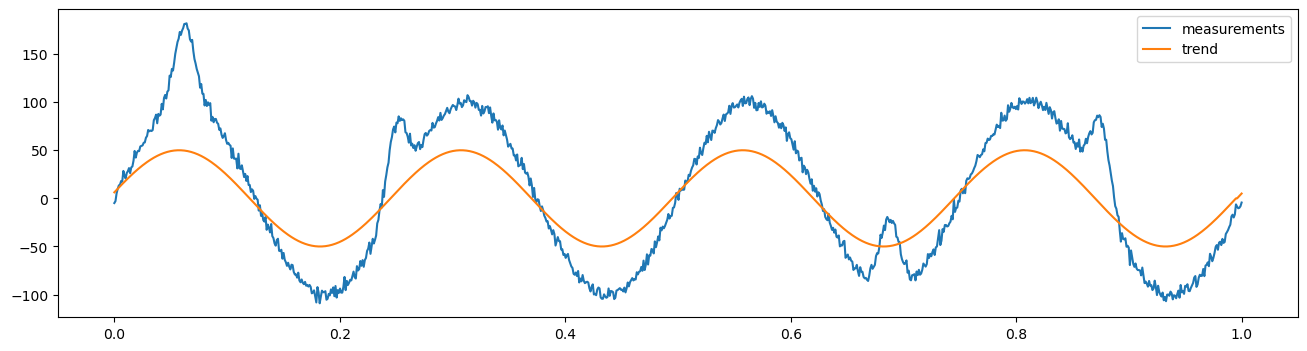

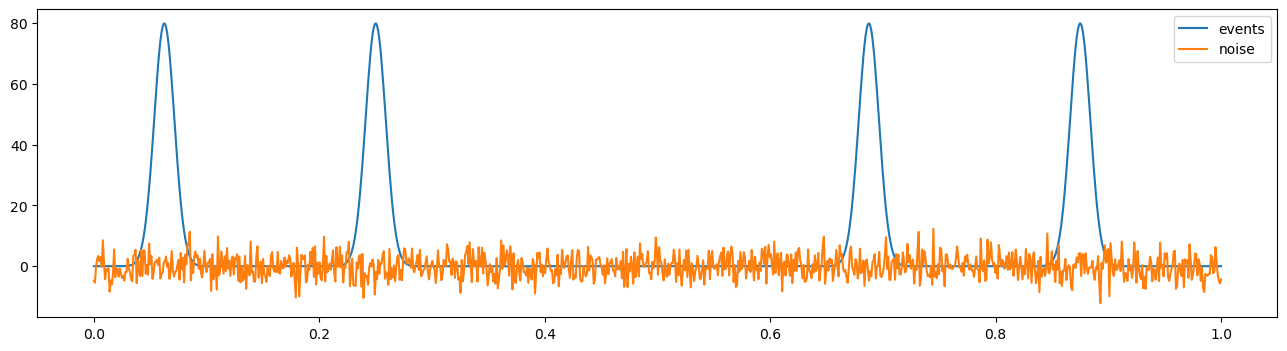

(event_to_trend_amplitude, event_length_to_trend_periods) (0.4, 0.5000000000000001)


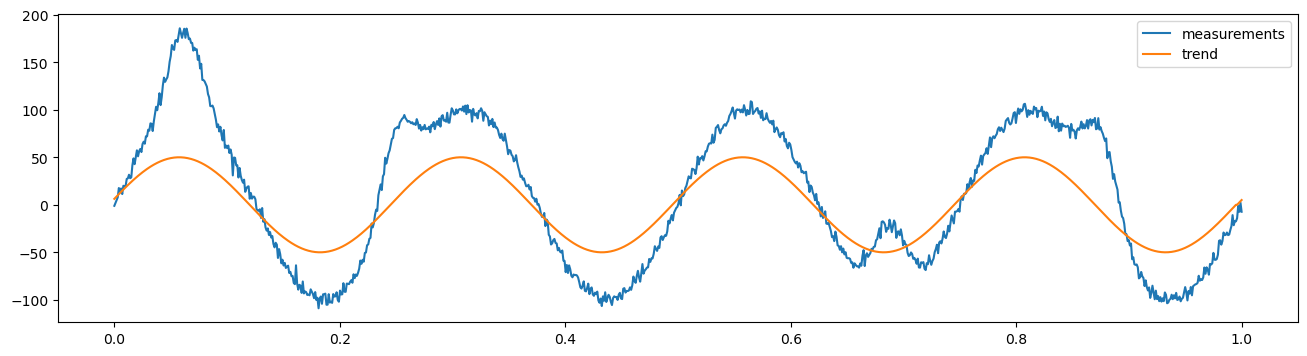

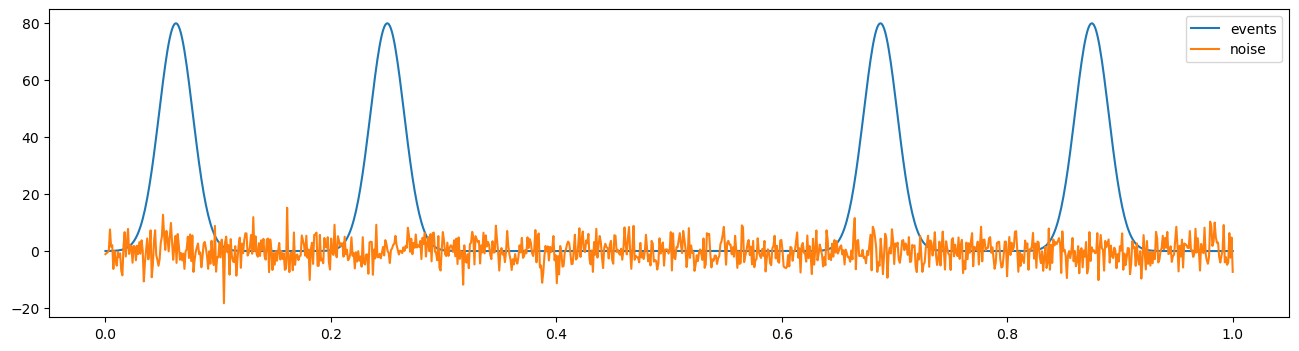

(event_to_trend_amplitude, event_length_to_trend_periods) (0.5, 0.1)


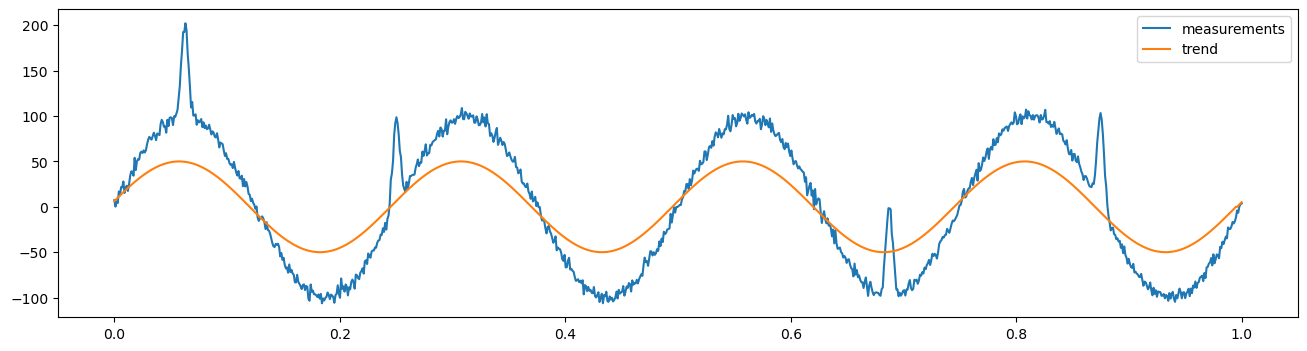

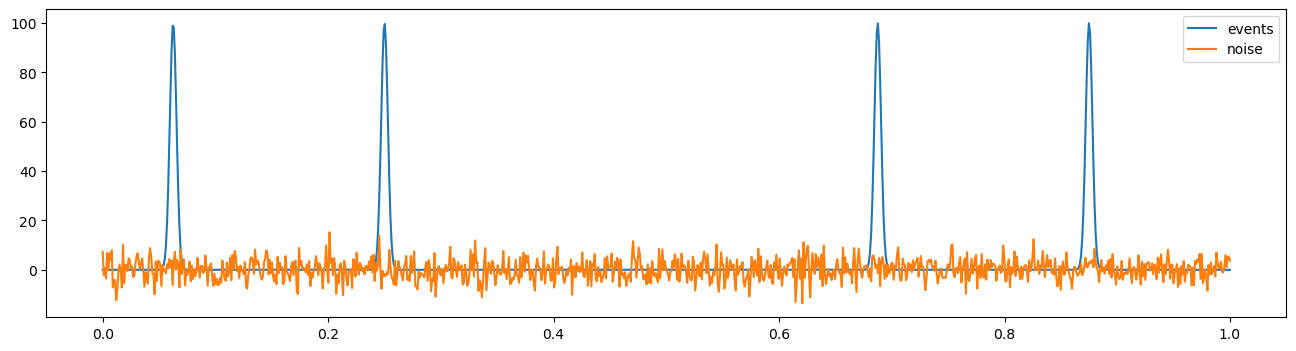

(event_to_trend_amplitude, event_length_to_trend_periods) (0.5, 0.30000000000000004)


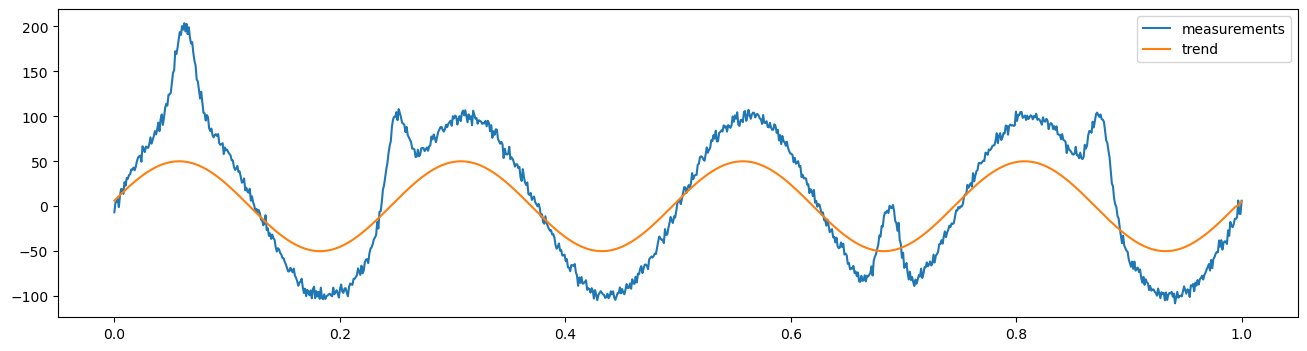

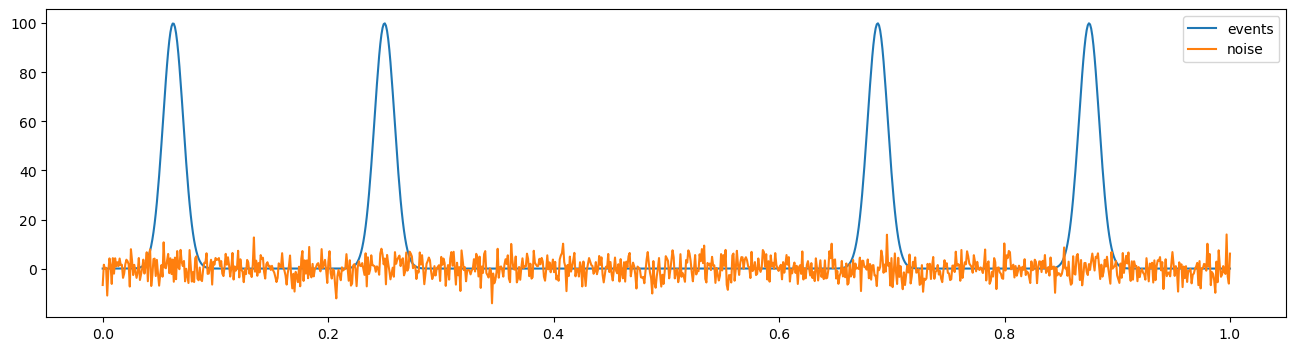

(event_to_trend_amplitude, event_length_to_trend_periods) (0.5, 0.5000000000000001)


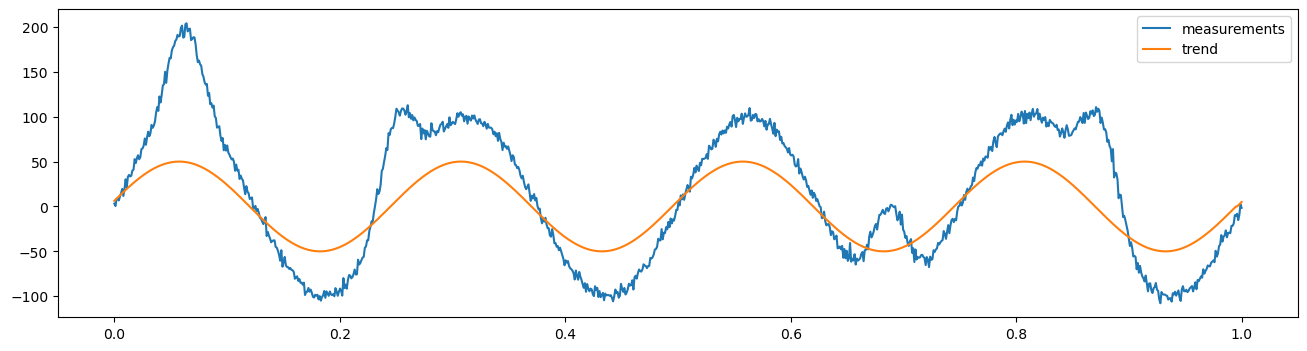

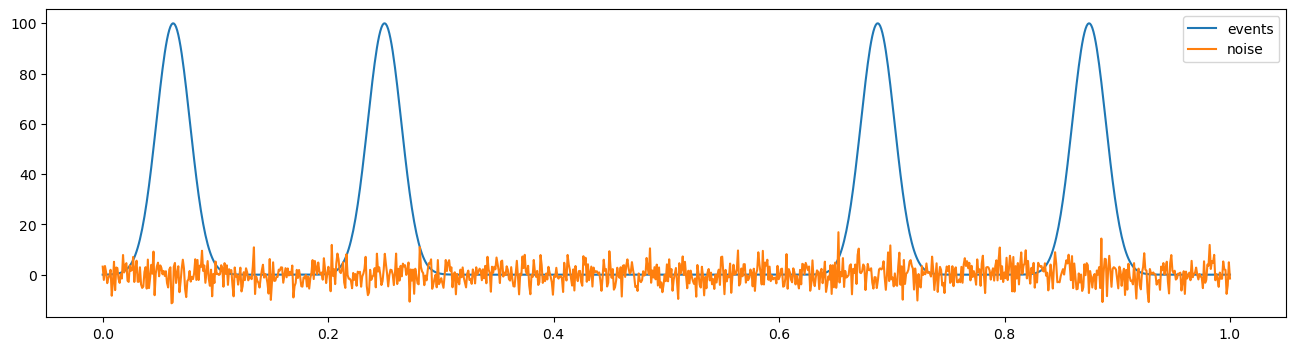

In [116]:
#plot all datasets
for key in datasets.keys():
    print('(event_to_trend_amplitude, event_length_to_trend_periods)', key)
    plt.figure(figsize=(16, 4))
    plt.plot(datasets[key]['t'], datasets[key]['y_measurements'], label='measurements')
    plt.plot(datasets[key]['t'], datasets[key]['input_'], label='trend')
    plt.legend()
    plt.show()
    plt.close()
    plt.figure(figsize=(16, 4))
    plt.plot(datasets[key]['t'], datasets[key]['y_events'], label='events')
    plt.plot(datasets[key]['t'], datasets[key]['y_noise'], label='noise')
    plt.legend()
    plt.show()
    plt.close()

event_to_trend_amplitude:  0.3
event_length_to_trend_periods:  0.1
event_amplitude:  60.0
pf_alpha:  1.9885465913931455


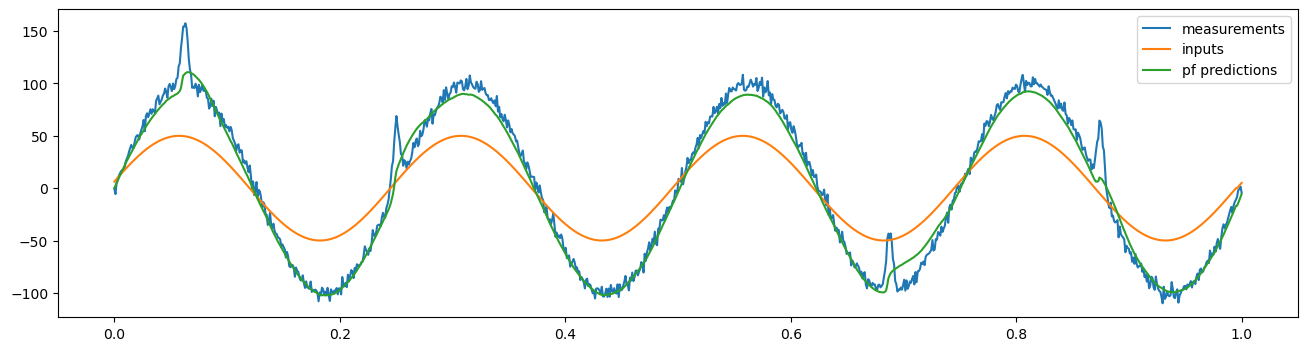

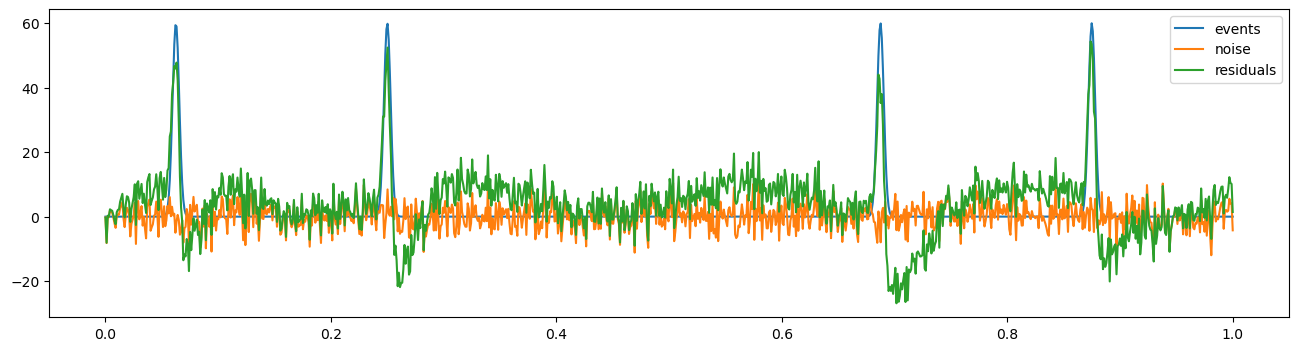

event_to_trend_amplitude:  0.3
event_length_to_trend_periods:  0.30000000000000004
event_amplitude:  60.0
pf_alpha:  1.9790141378361756


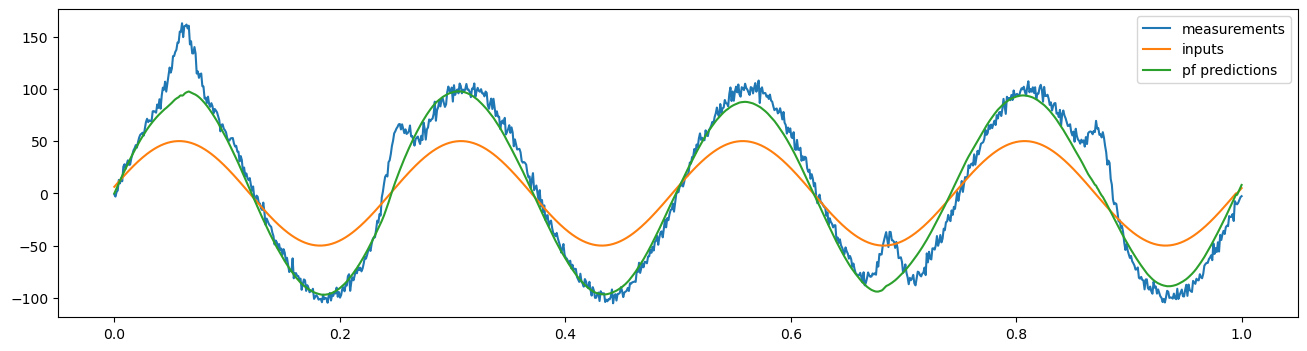

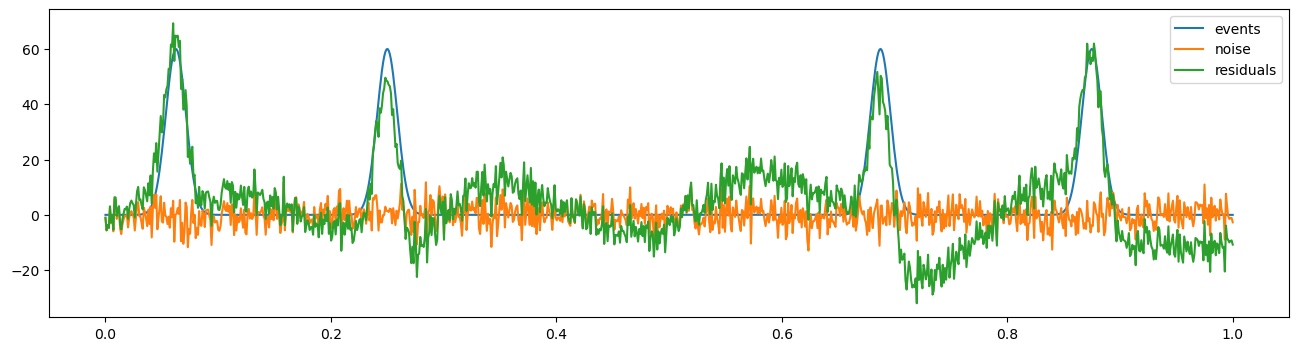

event_to_trend_amplitude:  0.3
event_length_to_trend_periods:  0.5000000000000001
event_amplitude:  60.0
pf_alpha:  1.9814058409941193


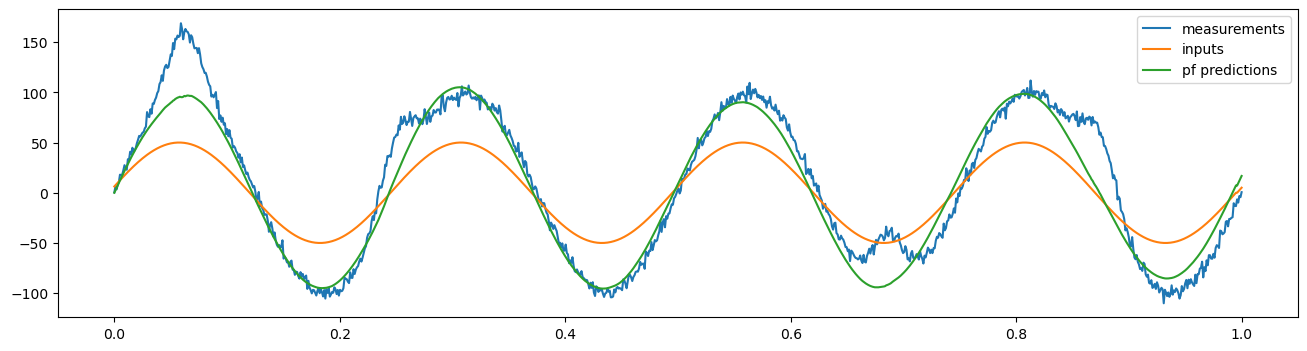

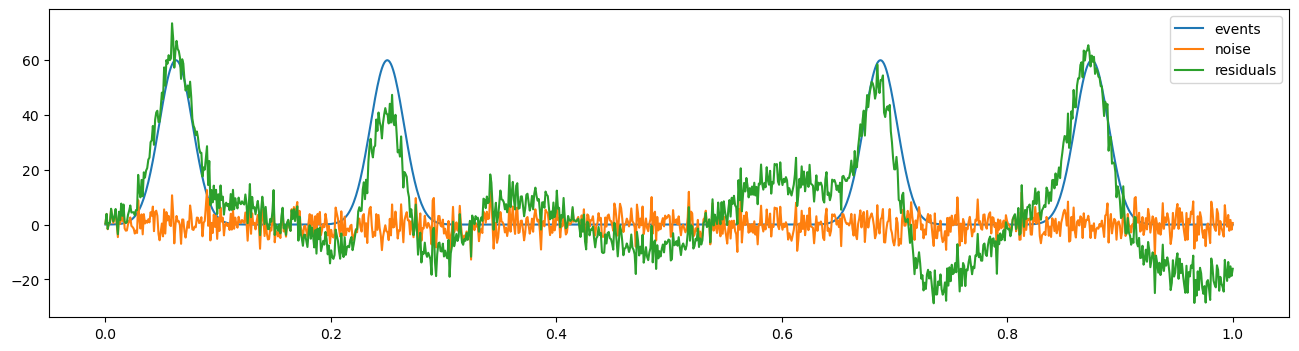

event_to_trend_amplitude:  0.4
event_length_to_trend_periods:  0.1
event_amplitude:  80.0
pf_alpha:  1.9833180130987378


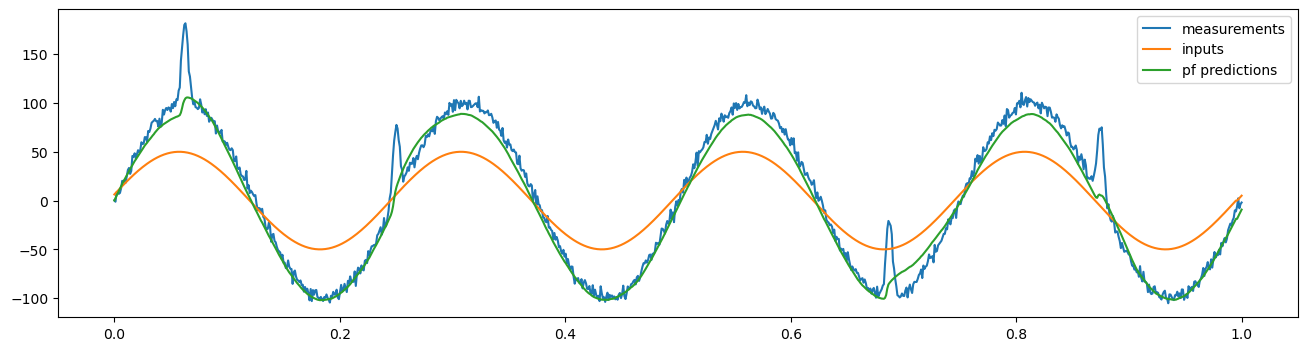

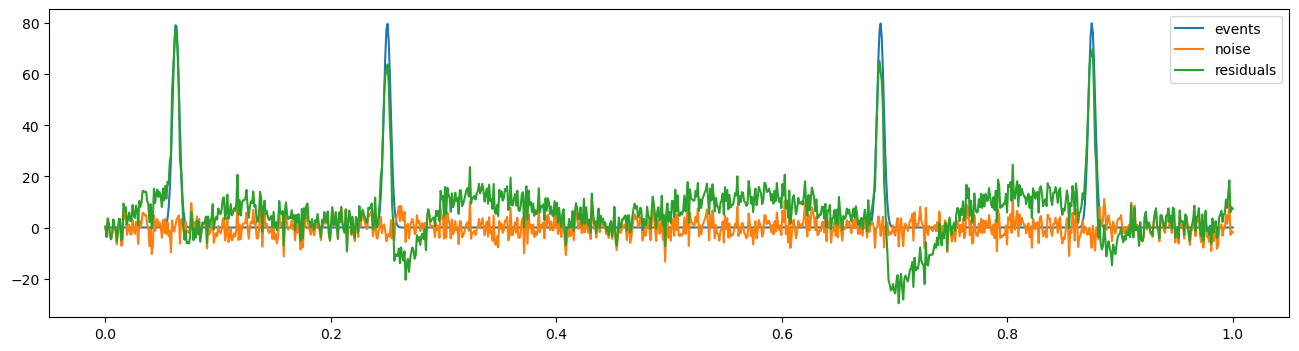

event_to_trend_amplitude:  0.4
event_length_to_trend_periods:  0.30000000000000004
event_amplitude:  80.0
pf_alpha:  1.989914800721433


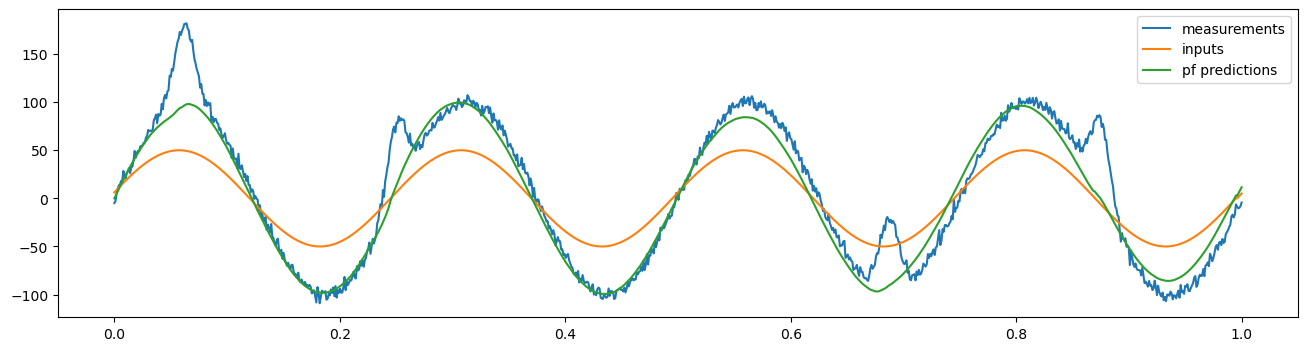

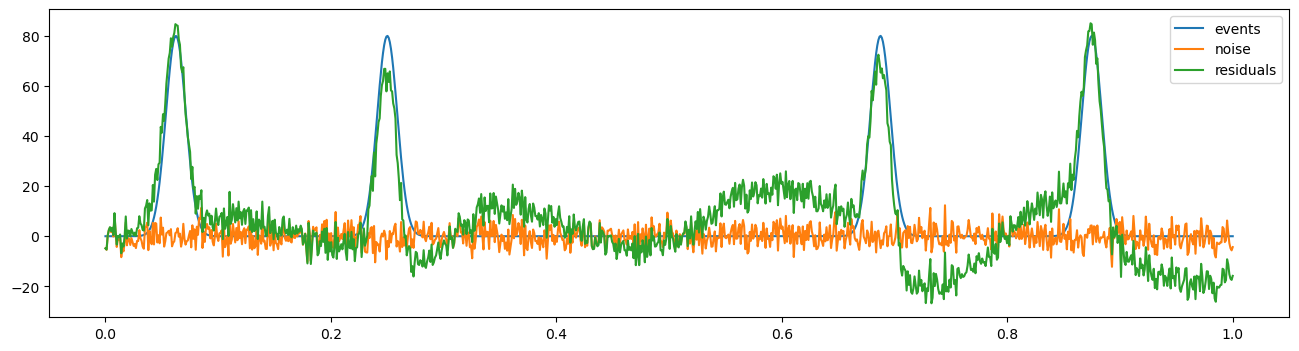

event_to_trend_amplitude:  0.4
event_length_to_trend_periods:  0.5000000000000001
event_amplitude:  80.0
pf_alpha:  1.9873055981770182


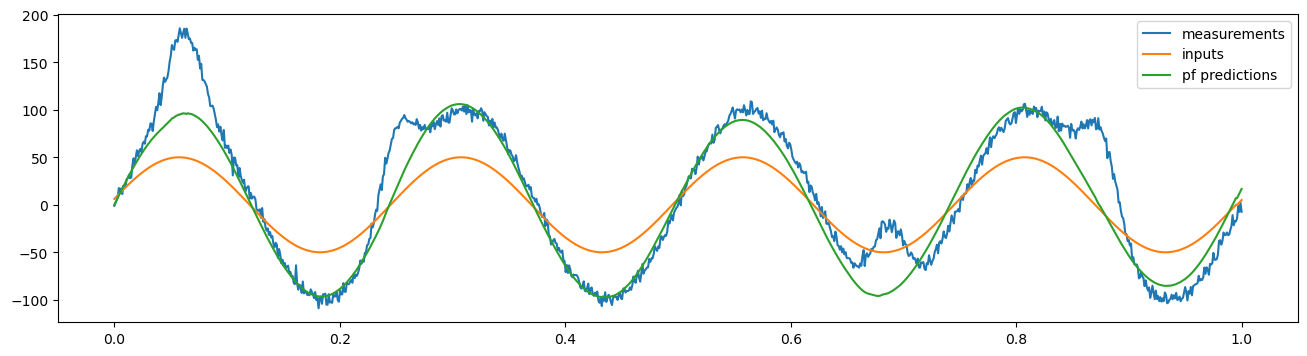

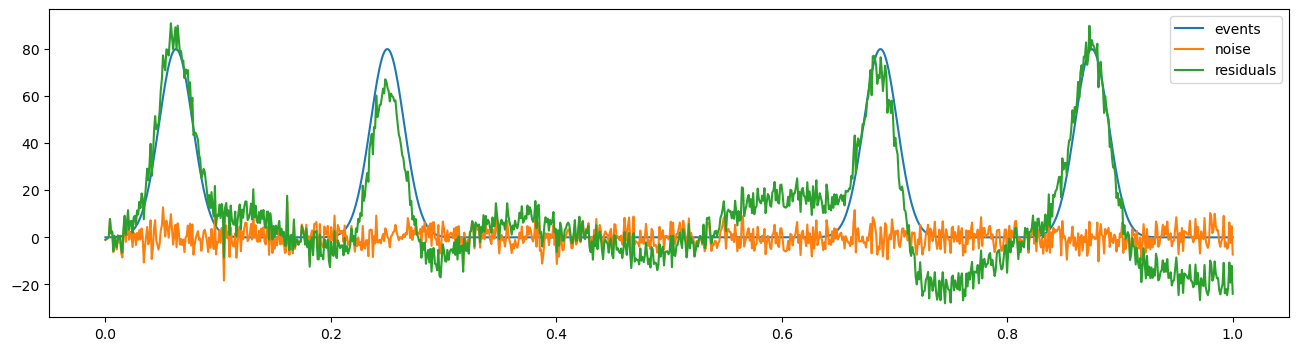

event_to_trend_amplitude:  0.5
event_length_to_trend_periods:  0.1
event_amplitude:  100.0
pf_alpha:  1.9808109835108647


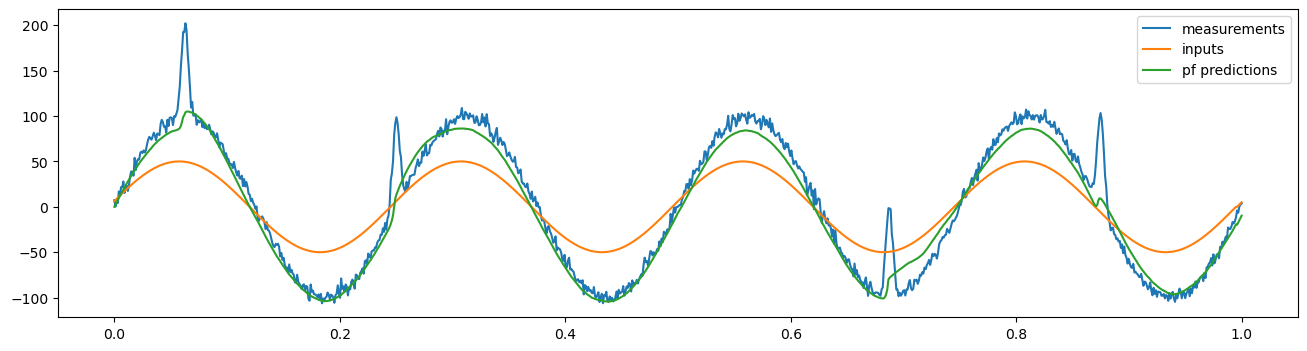

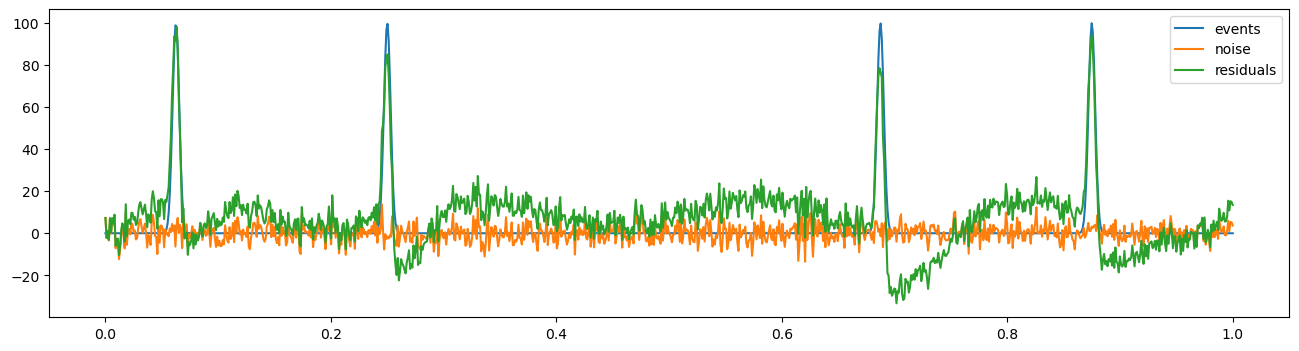

event_to_trend_amplitude:  0.5
event_length_to_trend_periods:  0.30000000000000004
event_amplitude:  100.0
pf_alpha:  1.9939163086173004


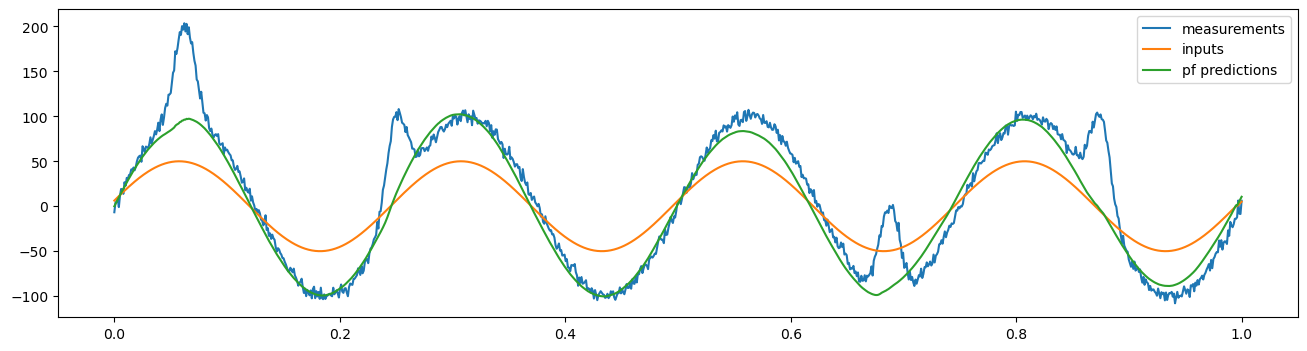

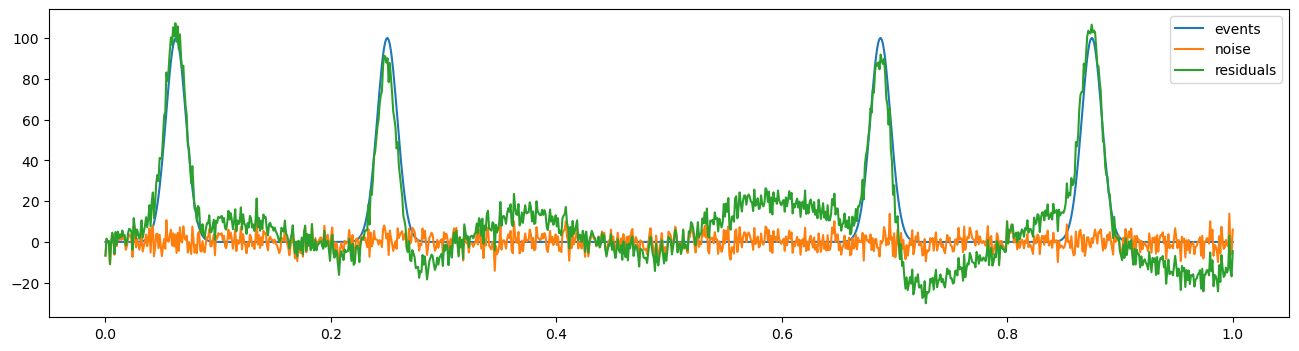

event_to_trend_amplitude:  0.5
event_length_to_trend_periods:  0.5000000000000001
event_amplitude:  100.0
pf_alpha:  1.987658925707077


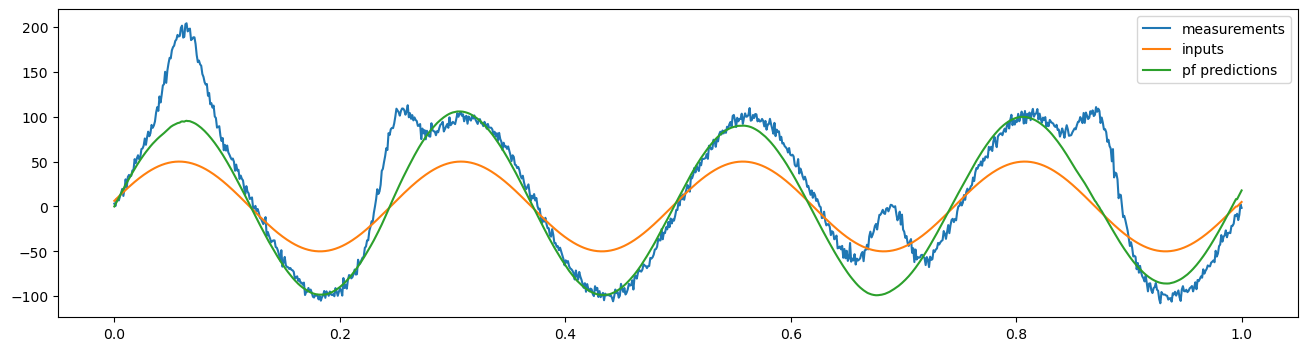

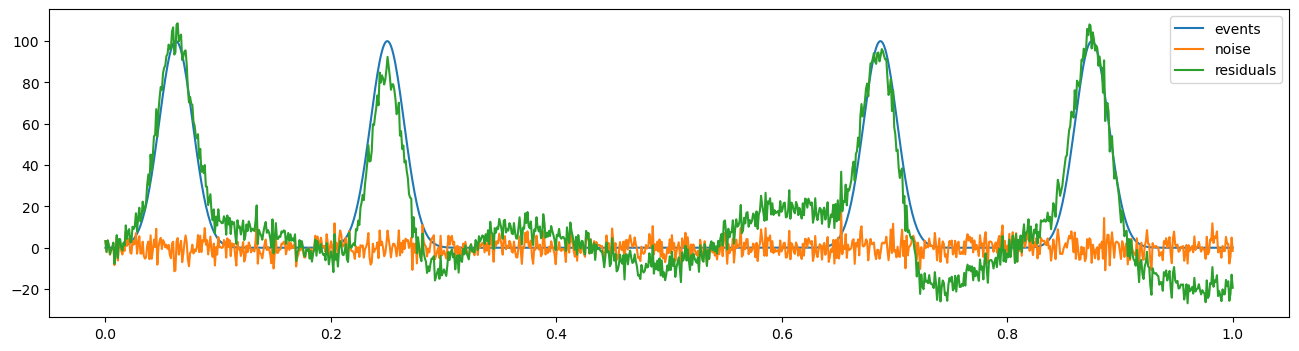

In [117]:
from filter_tc.particle_filter import ParticleFilter
from filter_tc.utils import learn_alpha
#plot all datasets
for key in datasets.keys():
    measurements = np.array(datasets[key]['y_measurements'])
    inputs= np.vstack([datasets[key]['input_'], np.insert(np.diff(datasets[key]['input_']),0,0)])

    event_to_trend_amplitude = key[0]
    event_length_to_trend_periods = key[1]

    print('event_to_trend_amplitude: ', event_to_trend_amplitude)
    print('event_length_to_trend_periods: ', event_length_to_trend_periods)

    event_amplitude = event_to_trend_amplitude*trend['amplitude']
    print('event_amplitude: ', event_amplitude)

    num_particles=1000
    pf_alpha = learn_alpha(datasets[key]['input_'].reshape(-1, 1),measurements)
    print('pf_alpha: ', pf_alpha)
    pf = ParticleFilter(
        num_particles=num_particles,
        r_measurement_noise=int(event_amplitude*2),
        q_process_noise=np.array([1/(event_length_to_trend_periods*10), 1]),
        loc=-int(event_amplitude*1.1),
        alpha = pf_alpha)
    
    predictions = pf.filter(measurements, inputs, loading=loading)

    
    plt.figure(figsize=(16, 4))
    plt.plot(datasets[key]['t'], datasets[key]['y_measurements'], label='measurements')
    plt.plot(datasets[key]['t'], datasets[key]['input_'], label='inputs')
    plt.plot(datasets[key]['t'], predictions, label='pf predictions')
    plt.legend()
    plt.show()
    plt.close()
    plt.figure(figsize=(16, 4))
    plt.plot(datasets[key]['t'], datasets[key]['y_events'], label='events')
    plt.plot(datasets[key]['t'], datasets[key]['y_noise'], label='noise')
    plt.plot(datasets[key]['t'], datasets[key]['y_measurements']-predictions, label='residuals')
    plt.legend()
    plt.show()
    plt.close()